In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import litholog
from litholog import utils, BedSequence

In [2]:
transforms = {c : utils.string2array_matlab for c in ['depth_m', 'grain_size_mm']}

beds = pd.read_csv('../../old_litholog_data/data/AllBedsWithProfiles.csv', converters=transforms)
beds.head()

,name,count,collection,eod,eodnum,tops,th,gs_tops_mm,snd_shl,mean_gs_mm,max_gs_mm,ng,ar,depth_m,grain_size_mm
0,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,22.81684,0.31082,0.115051,1.0,0.116073,0.117046,0.520514,0.021978,"[22.8168, 22.703, 22.5337, 22.506]","[0.1151, 0.1157, 0.117, 0.117]"
1,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,22.50602,0.60931,0.001000,0.0,0.001000,0.001000,0.520514,0.021978,"[22.506, 21.8967]","[0.001, 0.001]"
2,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.89671,0.10463,0.125380,1.0,0.125380,0.125380,0.520514,0.021978,"[21.8967, 21.7921]","[0.1254, 0.1254]"
3,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.79208,0.11694,0.001000,0.0,0.001000,0.001000,0.520514,0.021978,"[21.7921, 21.6751]","[0.001, 0.001]"
4,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.67514,0.13232,0.134306,1.0,0.150073,0.160420,0.520514,0.021978,"[21.6751, 21.6351, 21.5674, 21.5428]","[0.1343, 0.1447, 0.1604, 0.1604]"


In [3]:
name_list = ['Pukearuhue', 
             'Magnolia', 
             'Karoo krf1', 
             'Karoo krf2', 
             'Karoo krf3',
             'Karoo krf4', 
             'Karoo krf5', 
             'Sierra del Toro dc1',
             'Sierra del Toro dc2', 
             'Sierra del Toro flame', 
             'Sierra del Toro h2o',
             'Sierra del Toro ssm', 
             'Sierra del Toro wc']

demo_df = beds[beds.name.isin(name_list)]
demo_df.drop(labels=['count','eod','eodnum'],axis=1,inplace=True)
demo_df.collection.replace('Karoo','Skoorsteenberg',inplace=True)
demo_df.collection.unique()

/home/ross/anaconda3/envs/depstrat/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/ross/anaconda3/envs/depstrat/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


array(['Skoorsteenberg', 'Gulf of Mexico', 'Mount Messenger',
       'Cerro Toro'], dtype=object)

In [4]:
#demo_df.to_csv('working.csv',index=False)
# After this export, I changed a few tops values to match thickness at the base of each log in Excel... 

## Create BedSequences

In [5]:
# Columns shared by whole sequences (i.e., shared by an entire graphic log)
METACOLS = ['name', 'collection', 'ng', 'ar']

# Columns of bed-level data
DATACOLS = ['th', 'gs_tops_mm', 'snd_shl', 'depth_m',
            'gs_tops_mm', 'mean_gs_mm', 'max_gs_mm', 'grain_size_mm']

# Convert to a list of `BedSequence`s
seqs = []
for name, seq_df in demo_df.groupby('name'):
    seqs.append(
        BedSequence.from_dataframe(
            seq_df, 
            thickcol='th',
            component_map=litholog.defaults.DEFAULT_COMPONENT_MAP,
            metacols=METACOLS,
            datacols=DATACOLS,
        )
    )

testseq = seqs[0]

In [6]:
# need to make a grain_size_psi column
for bed in testseq:
    bed.data['grain_size_psi'] = litholog.wentworth.gs2psi(bed.data['grain_size_mm'])

In [7]:
testseq.order

'elevation'

set None `ws` to -1.0
set None `ws` to -6.0
set None `ws` to -1.0
set None `ws` to -6.0
set None `ws` to -1.0
set None `ws` to -6.0
set None `ws` to -1.0
set None `ws` to -6.0
set None `ws` to -1.0
set None `ws` to -6.0
set None `ws` to -1.0
set None `ws` to -6.0
set None `ws` to -1.0
set None `ws` to -6.0
set None `ws` to -1.0
set None `ws` to -6.0
set None `ws` to -1.0
set None `ws` to -6.0
set None `ws` to -1.0
set None `ws` to -6.0
set None `ws` to -1.0
set None `ws` to -1.0
set None `ws` to -1.0
set None `ws` to -6.0
set None `ws` to -1.0
set None `ws` to -6.0
set None `ws` to -1.0
set None `ws` to -1.0
set None `ws` to -6.0
set None `ws` to -1.0
set None `ws` to -6.0
set None `ws` to -1.0
set None `ws` to -6.0
set None `ws` to -1.0
set None `ws` to -6.0
set None `ws` to -1.0
set None `ws` to -6.0
set None `ws` to -1.0
set None `ws` to -6.0
set None `ws` to -1.0
set None `ws` to -6.0
set None `ws` to -1.0
set None `ws` to -6.0
set None `ws` to -1.0
set None `ws` to -6.0
set None `

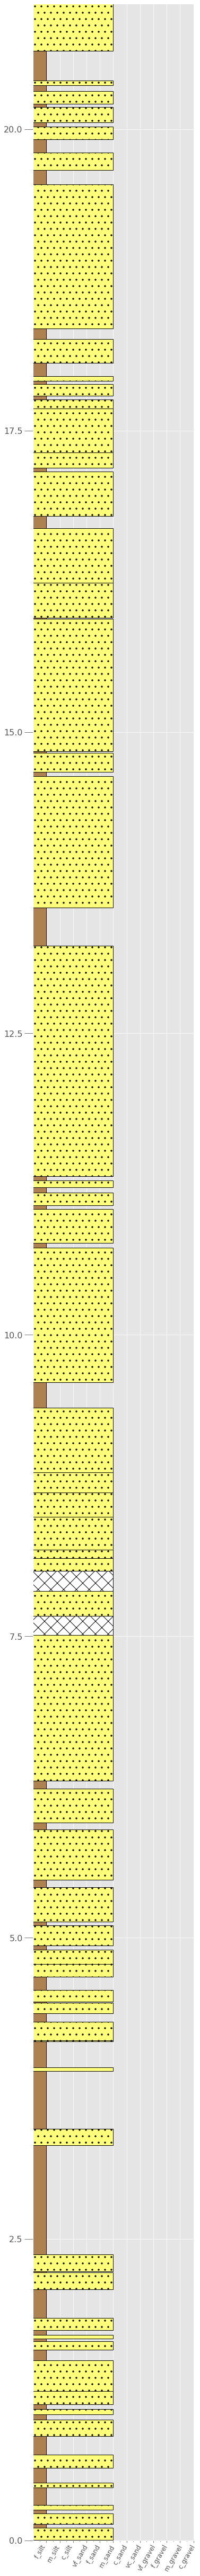

In [11]:
testseq.plot(fig_width=7)
# White boxes for missing

In [9]:
testseq[51] # a missing interval

Interval({'data': {'th': 0.165479621557918, 'gs_tops_mm': nan, 'snd_shl': nan, 'depth_m': array([8.0395, 7.874 ]), 'mean_gs_mm': nan, 'max_gs_mm': nan, 'grain_size_mm': array([nan, nan]), 'grain_size_psi': array([nan, nan])}, 'top': Position({'middle': 8.03951849975468, 'units': 'm'}), 'base': Position({'middle': 7.874038878196761, 'units': 'm'}), 'description': '', 'components': [Component({'lithology': 'missing'})]})

set [nan nan] `ws` to -1.0
set [nan nan] `ws` to -1.0


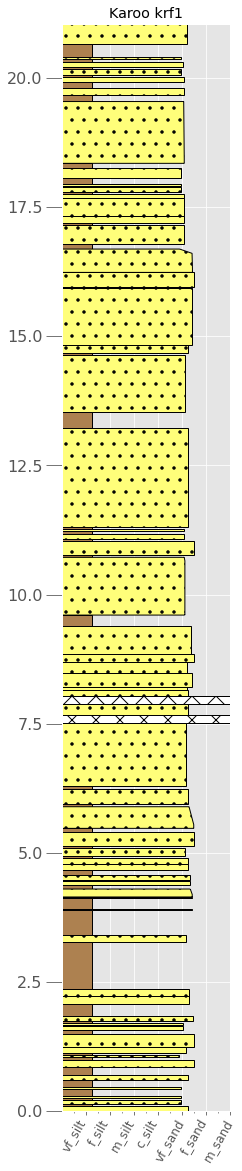

In [10]:
fig, ax = plt.subplots(figsize=[3,20])

testseq.plot(ax=ax,
                   legend=litholog.defaults.litholegend,
                   width_field='grain_size_psi',
                   depth_field='depth_m',
                   wentworth='fine'
                  )

ax.set_title(testseq.metadata['name']);

# nothing at all plotted for missing - see around 7.5 m